# IMPORTS

In [1]:
# Importing necessary libraries
import datetime
import os  # For operating system dependent functionality
import warnings

import cartopy.crs as ccrs  # For coordinate reference systems
import matplotlib as mpl  # For customizing plots
import matplotlib.colors as colors  # For working with colors in plots
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical computing
import pandas as pd  # For data manipulation
import xarray as xr  # For working with labeled multidimensional arrays
import xesmf as xe  # For regridding data
from cartopy.util import add_cyclic_point  # For adding cyclic points to data

# Configuration options
suppress_warnings = True
suppress_plots = False

# Suppressing warnings if suppress_warnings is True
if suppress_warnings:
    warnings.filterwarnings("ignore")

# Suppressing plots if suppress_plots is True
if suppress_plots:
    import matplotlib

    matplotlib.use("Agg")

# Printing current date and library versions
print(datetime.datetime.ctime(datetime.datetime.today()))  # Print current date and time
print("Matplotlib: ", mpl.__version__)  # Print Matplotlib version
print("Numpy     : ", np.__version__)  # Print NumPy version
print("Pandas   : ", pd.__version__)  # Print Pandas version
print("Xarray   : ", xr.__version__)  # Print Xarray version

Fri Nov 15 17:29:07 2024
Matplotlib:  3.9.1
Numpy     :  1.26.4
Pandas   :  2.2.2
Xarray   :  2024.6.0


In [2]:
# Define the directory path for slice files
path = "/glade/u/home/nwrye/OceanTemps_Compiles/Preprocessed Model Files/"

# List of file names to process for plio files and pi files respectively
pliofile_names = [
    "CCSM4_plio.nc",
    "CESM1.2_plio.nc",
    "CESM2_plio.nc",
    "COSMOS_plio.nc",
    "EC_Earth3.3_plio.nc",
    "HADGEM3_NEW_1997_plio.nc",
    "MIROC4_2004_plio.nc",
    "Utrecht_CESM1.0.5_plio.nc",
    "IPSLCM6A_LR_plio.nc",
    "GISS_plio.nc",
    "LEEDS_plio.nc",
    "NorESM-F_plio.nc",
    "IPSLCM5A_plio.nc",
    "IPSLCM5A2_plio.nc",
]

pifile_names = [
    "CCSM4_pi.nc",
    "CESM1.2_pi.nc",
    "CESM2_pi.nc",
    "COSMOS_pi.nc",
    "EC_Earth3.3_pi.nc",
    "HADGEM3_NEW_1997_pi.nc",
    "MIROC4_2004_pi.nc",
    "Utrecht_CESM1.0.5_pi.nc",
    "IPSLCM6A_LR_pi.nc",
    "GISS_pi.nc",
    "LEEDS_pi.nc",
    "NorESM-F_pi.nc",
    "IPSLCM5A_pi.nc",
    "IPSLCM5A2_pi.nc",
]

# Create an empty list to store sliced datasets for plio and pi files
pisds = []
pliosds = []

# Open and interpolate plio files
# Iterate through each plio file
for fname in pliofile_names:
    try:
        # Open the NetCDF dataset
        with xr.open_dataset(os.path.join(path, fname)) as dataset:
            # Select data within the specified latitude and level range
            sliced = dataset.sel(lat=slice(-60, 60), lev=slice(None, 4000))

            # Append the sliced dataset to the list
            pliosds.append(sliced)

            # Interpolate the data to the same level values as the first dataset if more than one dataset is present
            if len(pliosds) == 1:
                continue
            else:
                sliced_interp = sliced.interp(lev=pliosds[0].lev, method="linear")
                pliosds[-1] = sliced_interp
    except Exception as e:
        print(f"An error occurred while processing {fname}: {e}")

# Open and interpolate pi files
# Iterate through each pi file
for fname in pifile_names:
    try:
        # Open the NetCDF dataset
        with xr.open_dataset(os.path.join(path, fname)) as dataset:
            # Select data within the specified latitude and level range
            sliced = dataset.sel(lat=slice(-60, 60), lev=slice(None, 4000))

            # Append the sliced dataset to the list
            pisds.append(sliced)

            # Interpolate the data to the same level values as the plio dataset if more than one dataset is present
            if len(pisds) == 1:
                continue
            else:
                sliced_interp = sliced.interp(lev=pliosds[0].lev, method="linear")
                pisds[-1] = sliced_interp
    except Exception as e:
        print(f"An error occurred while processing {fname}: {e}")

# Check if both groups of files are on the same lev grid after interpolation
if len(pliosds) > 0 and len(pisds) > 0:
    plio_lev_values = pliosds[0].lev.values
    pi_lev_values = pisds[0].lev.values

    # Check if the level values of plio and pi datasets are the same
    if (plio_lev_values == pi_lev_values).all():
        print("Both groups of files are on the same lev grid after interpolation.")
    else:
        print("Both groups of files are not on the same lev grid after interpolation.")
else:
    print("No data found to compare.")

Both groups of files are on the same lev grid after interpolation.


In [3]:
def plot_slice(X, Y, Z, title):
    # Create a new figure with specified size
    fig = plt.figure(figsize=(11, 6.5))

    # Define colormap and normalization for the colorbar
    cmap = plt.get_cmap("coolwarm")  # Choose the colormap
    norm = colors.Normalize(vmin=-2, vmax=38)  # Normalize the color scale

    # Set the y-axis limit
    plt.ylim(-800)

    # Plot the data using contourf
    cs = plt.contourf(
        X, Y, Z, levels=10, cmap=cmap, norm=norm
    )  # Create filled contour plot

    # Add colorbar
    cbar = plt.colorbar(
        cs, shrink=0.6, orientation="horizontal", label="SST (Celcius)"
    )  # Add colorbar with label

    # Set title
    plt.title(title)  # Set the title of the plot

    # Show the plot
    plt.show()  # Display the plot


# List of model names
model_names = [
    "CCSM4",
    "CESM1.2",
    "CESM2",
    "COSMOS",
    "EC_Earth3.3",
    "HADGEM3",
    "MIROC4",
    "Utrecht",
    "IPSLCM6A",
    "GISS",
    "LEEDS",
    "NorESM-F",
    "IPSLCM5A",
    "IPSLCM5A2",
]

# LAT VS. DEPTH WHOLE OCEAN

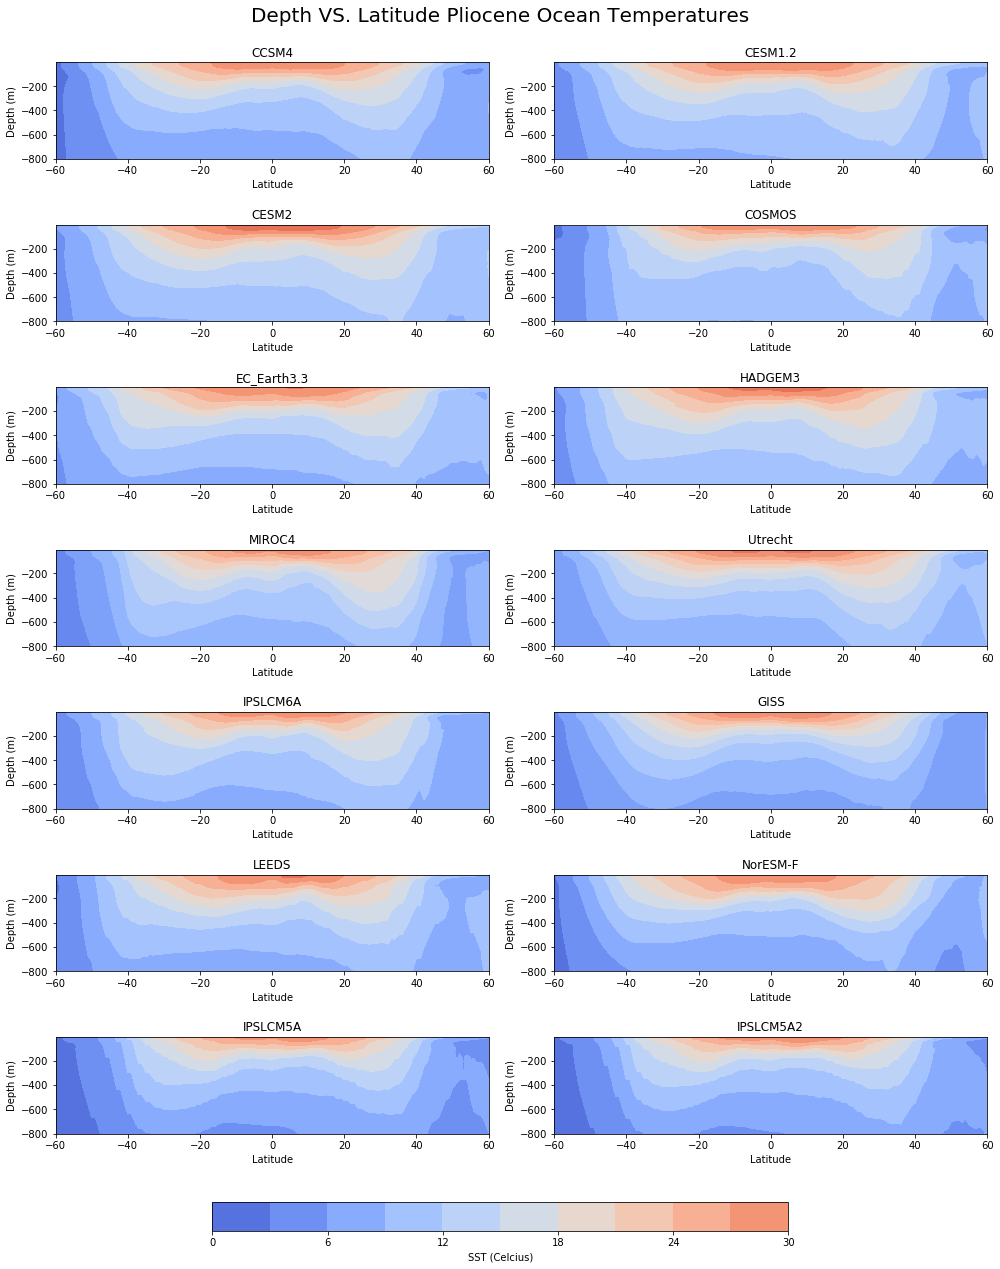

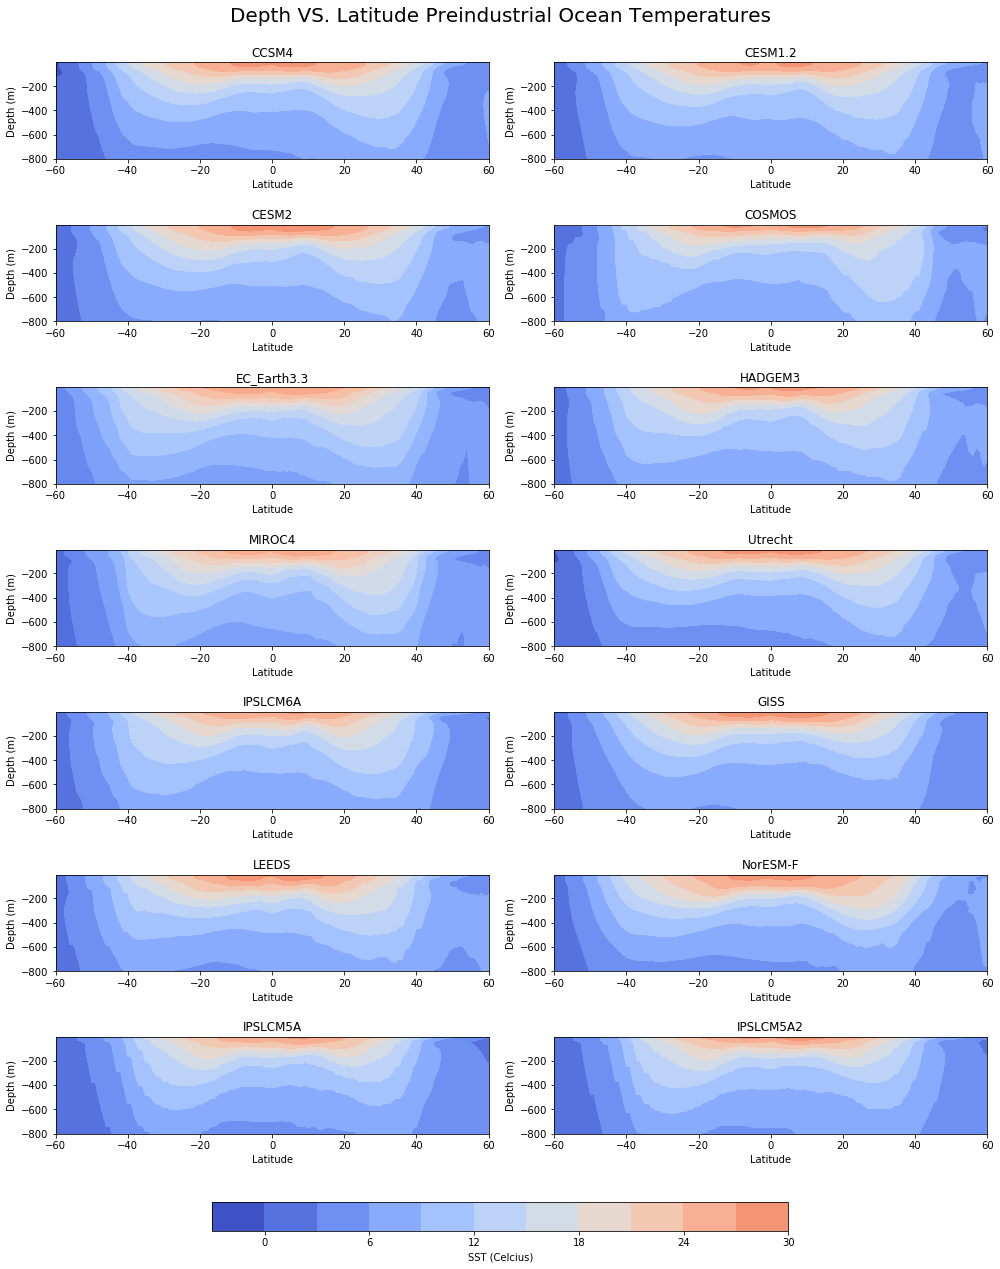

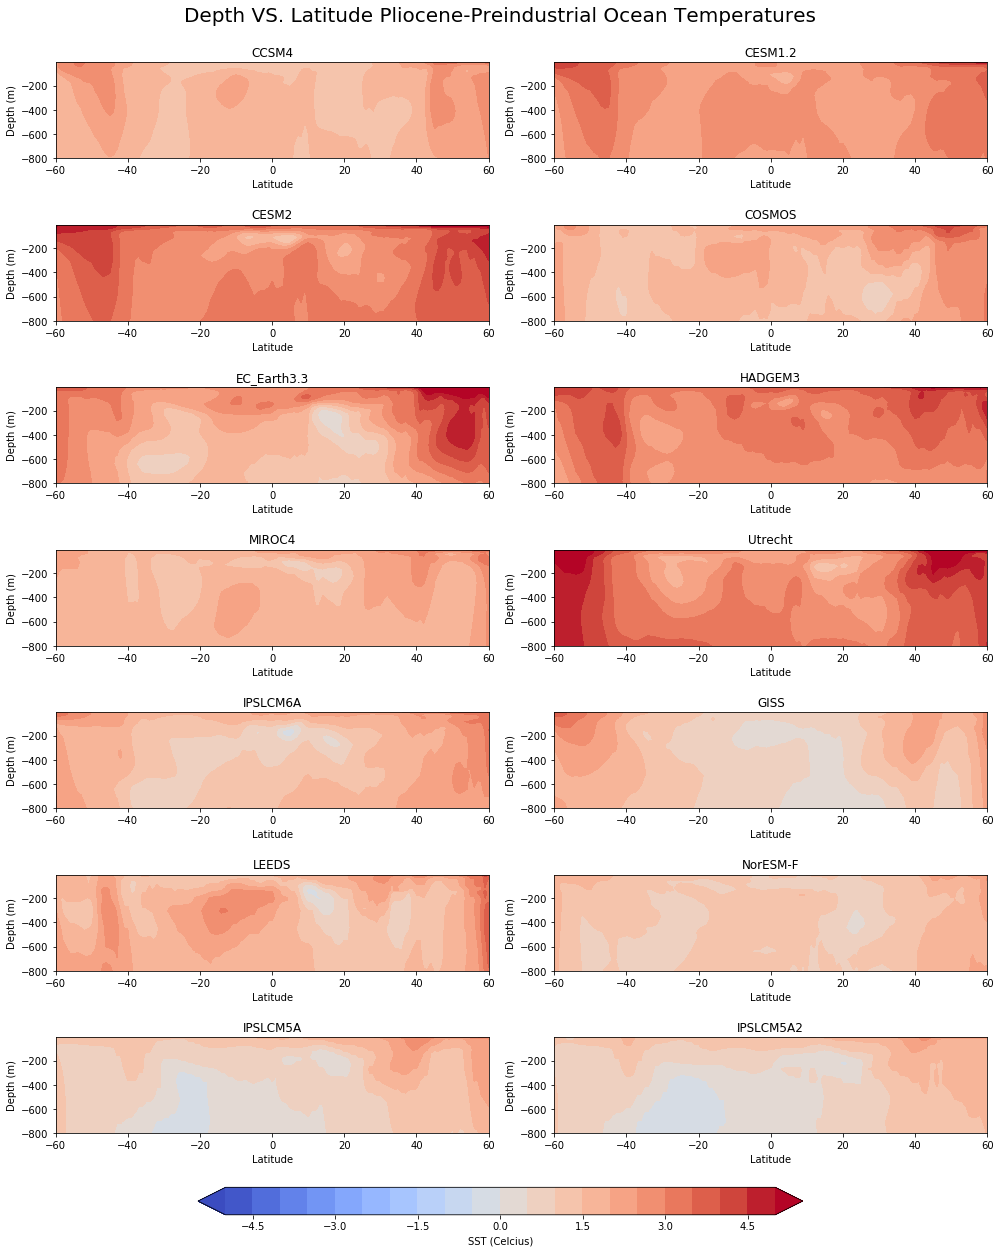

In [47]:
# Create a 7x2 subplot grid with a specified figure size
fig, axes = plt.subplots(7, 2, figsize=(14, 20))

# Flatten the 2D array of axes for easier indexing
axes = axes.flatten()

# Iterate over each pliosds dataset
for i, pliods in enumerate(pliosds):
    # Calculate the row and column indices for subplot
    row = i // 2
    col = i % 2

    # Plotting on the specified subplot
    cs = axes[i].contourf(
        pliods.lat,
        -pliods["lev"],
        pliods["TEMP"][:, :, :].mean(
            dim="lon"
        ),  # Plotting mean temperature over longitude
        levels=10,
        cmap="coolwarm",
        norm=colors.Normalize(vmin=-2, vmax=38),
    )

    # Set subplot title, y-axis limit, x-axis label, and y-axis label
    axes[i].set_title(model_names[i])  # Set title to model name
    axes[i].set_ylim(-800)  # Set y-axis limit
    axes[i].set_xlabel("Latitude")  # Set x-axis label
    axes[i].set_ylabel("Depth (m)")  # Set y-axis label

# Add a single colorbar for the entire 7x2 grid
cbar = fig.colorbar(
    cs, ax=axes, orientation="horizontal", shrink=0.6, label="SST (Celcius)"
)

# Set an overall title with increased font size
fig.suptitle("Depth VS. Latitude Pliocene Ocean Temperatures", fontsize=20, y=0.87)

# Adjust layout to prevent overlapping and move title and colorbar down
plt.tight_layout(rect=[0, 0.08, 1, 0.85])

# Adjust colorbar position
cbar.ax.set_position([0.2, 0.02, 0.6, 0.02])

# Setting output path
path = "/glade/u/home/nwrye/OceanTemps_Compiles/Plot Images/"

# Save the figure as a large image file (e.g., PNG)
plt.savefig(path + "lev_lat_pliocene.pdf", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()

###########################

# Create a 7x2 subplot grid with a specified figure size
fig, axes = plt.subplots(7, 2, figsize=(14, 20))

# Flatten the 2D array of axes for easier indexing
axes = axes.flatten()

# Iterate over each pisds dataset
for i, pids in enumerate(pisds):
    # Calculate the row and column indices for subplot
    row = i // 2
    col = i % 2

    # Plotting on the specified subplot
    cs = axes[i].contourf(
        pids.lat,
        -pids["lev"],
        pids["TEMP"][:, :, :].mean(
            dim="lon"
        ),  # Plotting mean temperature over longitude
        levels=10,
        cmap="coolwarm",
        norm=colors.Normalize(vmin=-2, vmax=38),
    )

    # Set subplot title, y-axis limit, x-axis label, and y-axis label
    axes[i].set_title(model_names[i])  # Set title to model name
    axes[i].set_ylim(-800)  # Set y-axis limit
    axes[i].set_xlabel("Latitude")  # Set x-axis label
    axes[i].set_ylabel("Depth (m)")  # Set y-axis label

# Add a single colorbar for the entire 7x2 grid
cbar = fig.colorbar(
    cs, ax=axes, orientation="horizontal", shrink=0.6, label="SST (Celcius)"
)

# Set an overall title with increased font size
fig.suptitle("Depth VS. Latitude Preindustrial Ocean Temperatures", fontsize=20, y=0.87)

# Adjust layout to prevent overlapping and move title and colorbar down
plt.tight_layout(rect=[0, 0.08, 1, 0.85])

# Adjust colorbar position
cbar.ax.set_position([0.2, 0.02, 0.6, 0.02])

# Setting output path
path = "/glade/u/home/nwrye/OceanTemps_Compiles/Plot Images/"

# Save the figure as a large image file (e.g., PNG)
plt.savefig(path + "lev_lat_preindustrial.pdf", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()

#########################


def h_diff(plio_ds, pi_ds):
    return plio_ds - pi_ds


# Assuming pliosds, pisds, and model_names are defined elsewhere
model_anomalies = [
    h_diff(plio_ds["TEMP"], pi_ds["TEMP"]) for plio_ds, pi_ds in zip(pliosds, pisds)
]


def plot_slicediff(X, Y, Z, title):
    fig, ax = plt.subplots(figsize=(11, 6.5))
    contour_levels = np.linspace(
        -2, 6, 29
    )  # Adjusted levels to include values greater than 5
    cmap = plt.get_cmap("coolwarm", 28)  # Adjusted to match contour levels
    norm = plt.Normalize(vmin=-2, vmax=6)  # Adjusted normalization range
    cs = ax.contourf(X, Y, Z, levels=contour_levels, cmap=cmap, norm=norm)
    cbar = fig.colorbar(
        cs, ax=ax, orientation="horizontal", shrink=0.6, label="SST (Celcius)"
    )
    ax.set_title(title)
    ax.set_ylim(-800)
    plt.show()


fig, axes = plt.subplots(7, 2, figsize=(14, 20))

for ax, model_anomalie, model_name in zip(axes.flatten(), model_anomalies, model_names):
    cs = ax.contourf(
        model_anomalie.lat,
        -model_anomalie["lev"],
        model_anomalie.mean(dim="lon"),
        levels=np.linspace(-5, 5, 21),
        cmap="coolwarm",
        extend="both",
    )  # extend='both' to show values beyond the range
    ax.set_title(model_name)
    ax.set_ylim(-800)
    ax.set_xlabel("Latitude")
    ax.set_ylabel("Depth (m)")

# Move colorbar slightly more down
fig.subplots_adjust(bottom=0.08)

# Adjust colorbar position
cbar = fig.colorbar(
    cs,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.6,
    label="SST (Celcius)",
)
cbar.ax.set_position([0.2, 0.03, 0.6, 0.02])  # Adjust position

fig.suptitle(
    "Depth VS. Latitude Pliocene-Preindustrial Ocean Temperatures", fontsize=20, y=0.87
)
plt.tight_layout(rect=[0, 0.08, 1, 0.85])

# Setting output path
path = "/glade/u/home/nwrye/OceanTemps_Compiles/Plot Images/"

# Save the figure as a large image file (e.g., PNG)
plt.savefig(path + "lev_lat_plio-pi.pdf", dpi=300, bbox_inches="tight")

plt.show()

# PACIFIC BASIN SPECIFIC LAT VS. DEPTH

In [48]:
# Define the directory path for slice files
path = "/glade/u/home/nwrye/OceanTemps_Compiles/Pacific Basin Files/"

pliofile_names = [
    "CCSM4_plio_pacific.nc",
    "CESM1.2_plio_pacific.nc",
    "CESM2_plio_pacific.nc",
    "COSMOS_plio_pacific.nc",
    "EC_Earth3.3_plio_pacific.nc",
    "HADGEM3_NEW_1997_plio_pacific.nc",
    "MIROC4_2004_plio_pacific.nc",
    "Utrecht_CESM1.0.5_plio_pacific.nc",
    "IPSLCM6A_LR_plio_pacific.nc",
    "GISS_plio_pacific.nc",
    "LEEDS_plio_pacific.nc",
    "NorESM-F_plio_pacific.nc",
    "IPSLCM5A_plio_pacific.nc",
    "IPSLCM5A2_plio_pacific.nc",
]

pifile_names = [
    "CCSM4_pi_pacific.nc",
    "CESM1.2_pi_pacific.nc",
    "CESM2_pi_pacific.nc",
    "COSMOS_pi_pacific.nc",
    "EC_Earth3.3_pi_pacific.nc",
    "HADGEM3_NEW_1997_pi_pacific.nc",
    "MIROC4_2004_pi_pacific.nc",
    "Utrecht_CESM1.0.5_pi_pacific.nc",
    "IPSLCM6A_LR_pi_pacific.nc",
    "GISS_pi_pacific.nc",
    "LEEDS_pi_pacific.nc",
    "NorESM-F_pi_pacific.nc",
    "IPSLCM5A_pi_pacific.nc",
    "IPSLCM5A2_pi_pacific.nc",
]

# Create an empty list to store sliced datasets for Pacific plio and pi files
pacific_pisds = []
pacific_pliosds = []

# Open and interpolate plio files
# Iterate through each plio file
for fname in pliofile_names:
    try:
        # Open the NetCDF dataset
        with xr.open_dataset(os.path.join(path, fname)) as dataset:
            # Select data within the specified latitude and level range
            sliced = dataset.sel(lat=slice(-60, 60), lev=slice(None, 4000))

            # Append the sliced dataset to the list
            pacific_pliosds.append(sliced)

            # Interpolate the data to the same level values as the first dataset if more than one dataset is present
            if len(pacific_pliosds) == 1:
                continue
            else:
                sliced_interp = sliced.interp(
                    lev=pacific_pliosds[0].lev, method="linear"
                )
                pacific_pliosds[-1] = sliced_interp
    except Exception as e:
        print(f"An error occurred while processing {fname}: {e}")

# Open and interpolate pi files
# Iterate through each pi file
for fname in pifile_names:
    try:
        # Open the NetCDF dataset
        with xr.open_dataset(os.path.join(path, fname)) as dataset:
            # Select data within the specified latitude and level range
            sliced = dataset.sel(lat=slice(-60, 60), lev=slice(None, 4000))

            # Append the sliced dataset to the list
            pacific_pisds.append(sliced)

            # Interpolate the data to the same level values as the plio dataset if more than one dataset is present
            if len(pacific_pisds) == 1:
                continue
            else:
                sliced_interp = sliced.interp(
                    lev=pacific_pliosds[0].lev, method="linear"
                )
                pacific_pisds[-1] = sliced_interp
    except Exception as e:
        print(f"An error occurred while processing {fname}: {e}")

# Check if both groups of files are on the same lev grid after interpolation
if len(pacific_pliosds) > 0 and len(pacific_pisds) > 0:
    plio_lev_values = pacific_pliosds[0].lev.values
    pi_lev_values = pacific_pisds[0].lev.values

    # Check if the level values of plio and pi datasets are the same
    if (plio_lev_values == pi_lev_values).all():
        print("Both groups of files are on the same lev grid after interpolation.")
    else:
        print("Both groups of files are not on the same lev grid after interpolation.")
else:
    print("No data found to compare.")

Both groups of files are on the same lev grid after interpolation.


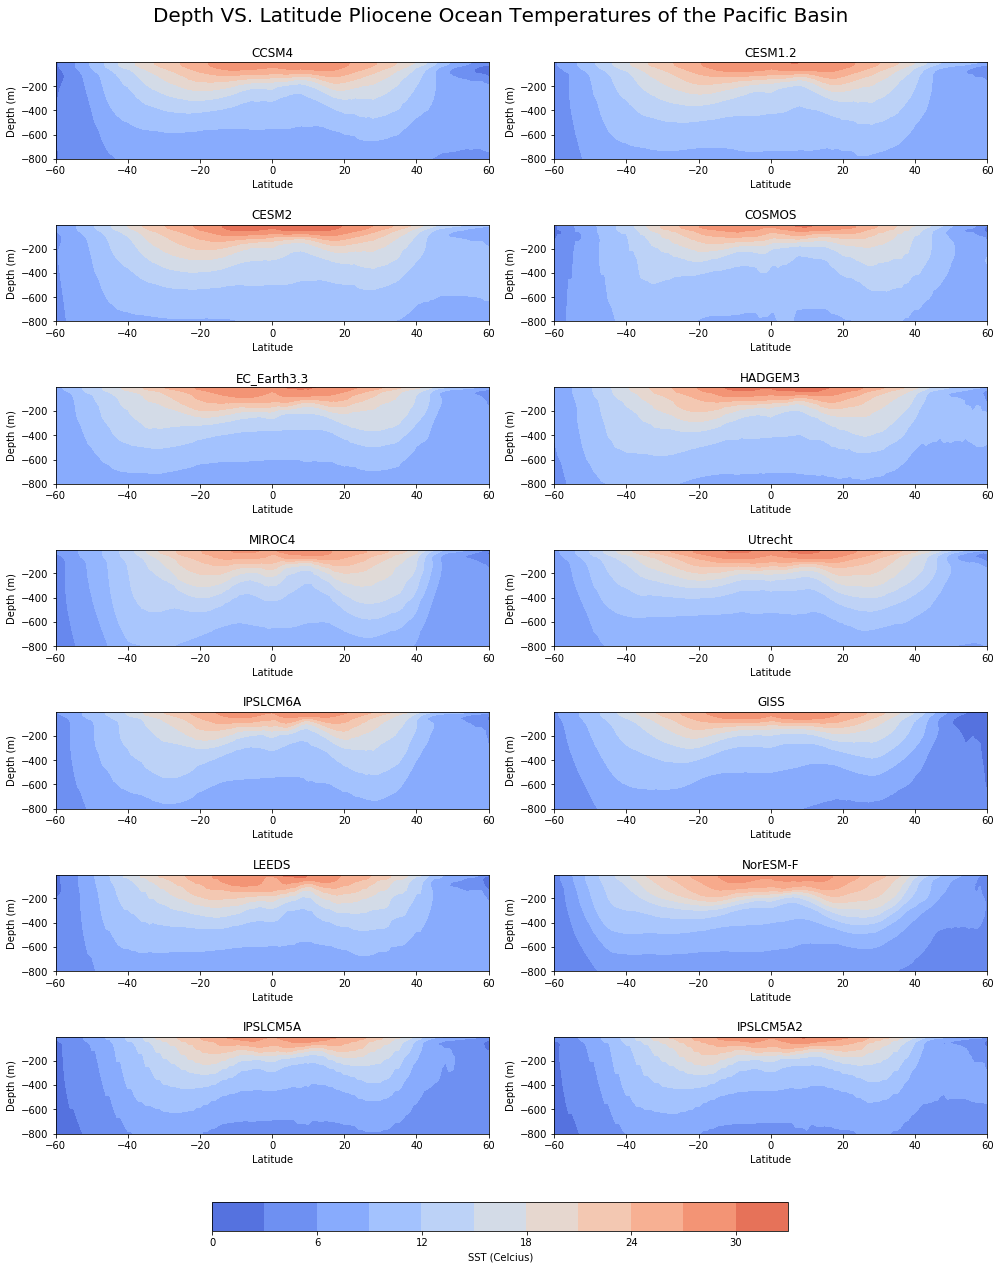

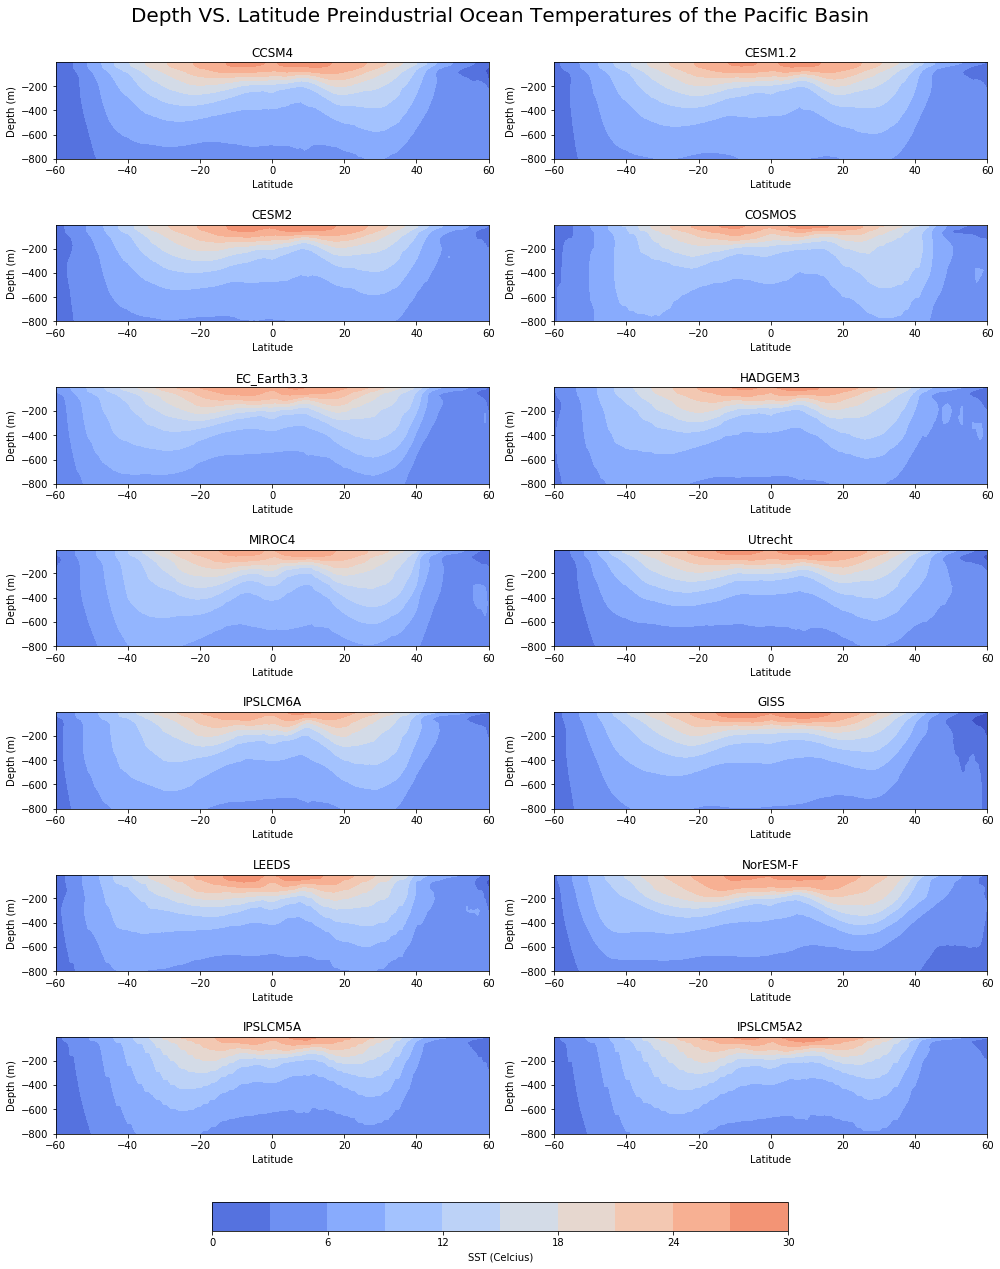

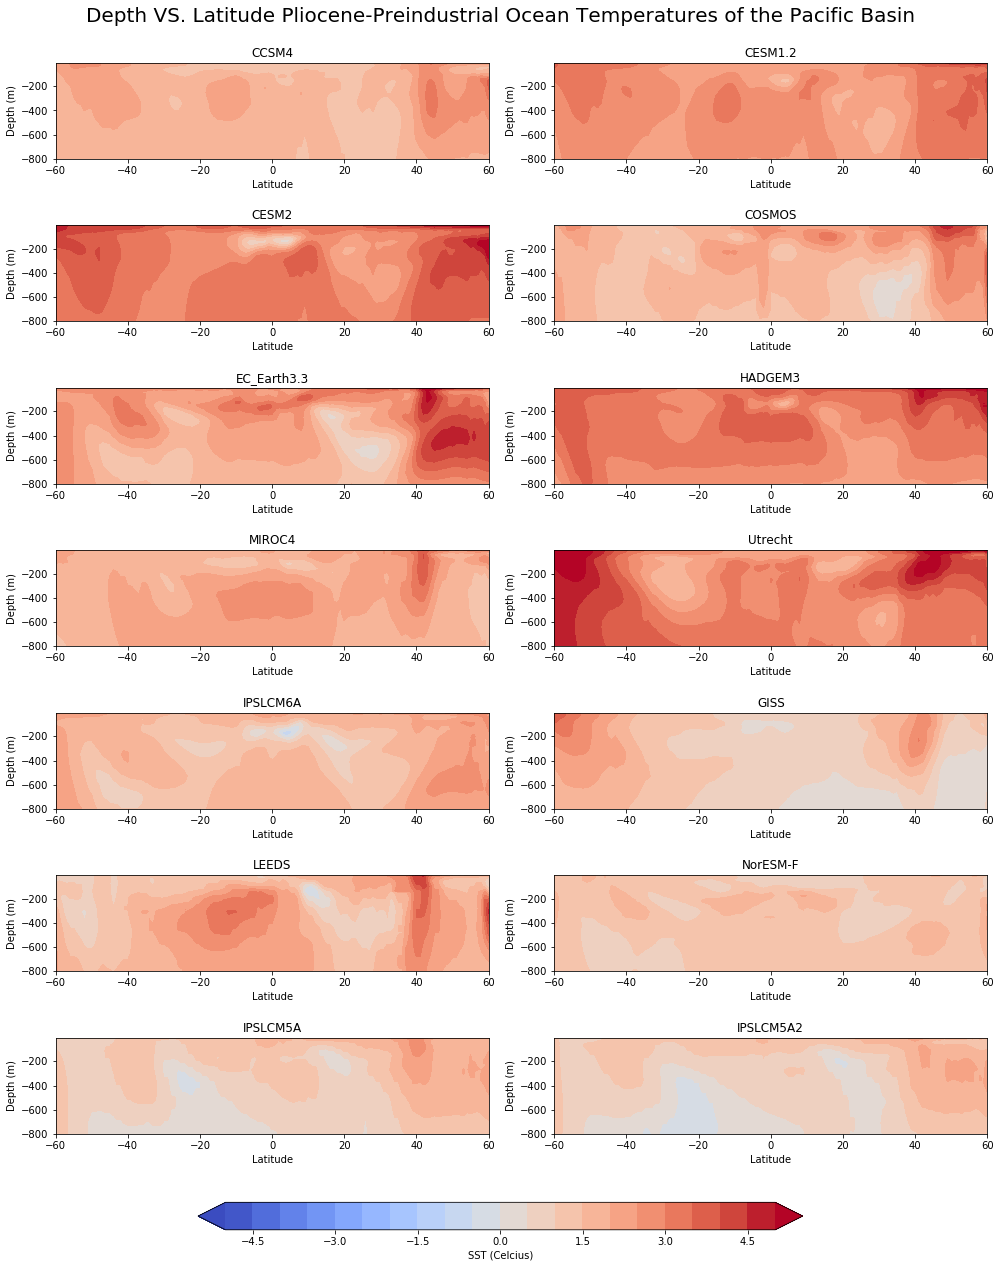

In [49]:
# Create a 7x2 subplot grid with a specified figure size for Pliocene datasets
fig, axes = plt.subplots(7, 2, figsize=(14, 20))

# Flatten the 2D array of axes for easier indexing
axes = axes.flatten()

# Iterate over each Pacific Pliocene dataset
for i, pliods in enumerate(pacific_pliosds):
    # Plotting on the specified subplot
    cs = axes[i].contourf(
        pliods.lat,
        -pliods["lev"],
        pliods["TEMP"][:, :, :].mean(
            dim="lon"
        ),  # Plotting mean temperature over longitude
        levels=10,
        cmap="coolwarm",
        norm=colors.Normalize(vmin=-2, vmax=38),
    )

    # Set subplot title, y-axis limit, x-axis label, and y-axis label
    axes[i].set_title(model_names[i])  # Set title to model name
    axes[i].set_ylim(-800)  # Set y-axis limit
    axes[i].set_xlabel("Latitude")  # Set x-axis label
    axes[i].set_ylabel("Depth (m)")  # Set y-axis label

# Add a single colorbar for the entire 7x2 grid for Pliocene datasets
cbar = fig.colorbar(
    cs, ax=axes, orientation="horizontal", shrink=0.6, label="SST (Celcius)"
)

# Set an overall title with increased font size for Pliocene datasets
fig.suptitle(
    "Depth VS. Latitude Pliocene Ocean Temperatures of the Pacific Basin",
    fontsize=20,
    y=0.87,
)

# Adjust layout to prevent overlapping and move title and colorbar down for Pliocene datasets
plt.tight_layout(rect=[0, 0.08, 1, 0.85])

# Adjust colorbar position for Pliocene datasets
cbar.ax.set_position([0.2, 0.02, 0.6, 0.02])

# Setting output path
path = "/glade/u/home/nwrye/OceanTemps_Compiles/Plot Images/"

# Save the figure as a large image file (e.g., PNG)
plt.savefig(path + "lev_lat_pliocene_pacific.pdf", dpi=300, bbox_inches="tight")

# Display the plot for Pliocene datasets
plt.show()

#######################

# Create a 7x2 subplot grid with a specified figure size for Preindustrial datasets
fig, axes = plt.subplots(7, 2, figsize=(14, 20))

# Flatten the 2D array of axes for easier indexing
axes = axes.flatten()

# Iterate over each Pacific Preindustrial dataset
for i, pids in enumerate(pacific_pisds):
    # Plotting on the specified subplot
    cs = axes[i].contourf(
        pids.lat,
        -pids["lev"],
        pids["TEMP"][:, :, :].mean(
            dim="lon"
        ),  # Plotting mean temperature over longitude
        levels=10,
        cmap="coolwarm",
        norm=colors.Normalize(vmin=-2, vmax=38),
    )

    # Set subplot title, y-axis limit, x-axis label, and y-axis label
    axes[i].set_title(model_names[i])  # Set title to model name
    axes[i].set_ylim(-800)  # Set y-axis limit
    axes[i].set_xlabel("Latitude")  # Set x-axis label
    axes[i].set_ylabel("Depth (m)")  # Set y-axis label

# Add a single colorbar for the entire 7x2 grid for Preindustrial datasets
cbar = fig.colorbar(
    cs, ax=axes, orientation="horizontal", shrink=0.6, label="SST (Celcius)"
)

# Set an overall title with increased font size for Preindustrial datasets
fig.suptitle(
    "Depth VS. Latitude Preindustrial Ocean Temperatures of the Pacific Basin",
    fontsize=20,
    y=0.87,
)

# Adjust layout to prevent overlapping and move title and colorbar down for Preindustrial datasets
plt.tight_layout(rect=[0, 0.08, 1, 0.85])

# Adjust colorbar position for Preindustrial datasets
cbar.ax.set_position([0.2, 0.02, 0.6, 0.02])

# Setting output path
path = "/glade/u/home/nwrye/OceanTemps_Compiles/Plot Images/"

# Save the figure as a large image file (e.g., PNG)
plt.savefig(path + "lev_lat_preindustrial_pacific.pdf", dpi=300, bbox_inches="tight")

# Display the plot for Preindustrial datasets
plt.show()


def h_diff(plio_ds, pi_ds):
    return plio_ds - pi_ds


# Assuming pacific_pliosds, pacific_pisds, and model_names are defined elsewhere
model_anomalies = [
    h_diff(plio_ds["TEMP"], pi_ds["TEMP"])
    for plio_ds, pi_ds in zip(pacific_pliosds, pacific_pisds)
]


def plot_slicediff(X, Y, Z, title):
    fig, ax = plt.subplots(figsize=(11, 6.5))
    contour_levels = np.linspace(
        -2, 6, 29
    )  # Adjusted levels to include values greater than 5
    cmap = plt.get_cmap("coolwarm", 28)  # Adjusted to match contour levels
    norm = plt.Normalize(vmin=-2, vmax=6)  # Adjusted normalization range
    cs = ax.contourf(X, Y, Z, levels=contour_levels, cmap=cmap, norm=norm)
    cbar = fig.colorbar(
        cs, ax=ax, orientation="horizontal", shrink=0.6, label="SST (Celcius)"
    )
    ax.set_title(title)
    ax.set_ylim(-800)
    plt.show()


fig, axes = plt.subplots(7, 2, figsize=(14, 20))

for ax, model_anomalie, model_name in zip(axes.flatten(), model_anomalies, model_names):
    cs = ax.contourf(
        model_anomalie.lat,
        -model_anomalie["lev"],
        model_anomalie.mean(dim="lon"),
        levels=np.linspace(-5, 5, 21),
        cmap="coolwarm",
        extend="both",
    )  # extend='both' to show values beyond the range
    ax.set_title(model_name)
    ax.set_ylim(-800)
    ax.set_xlabel("Latitude")
    ax.set_ylabel("Depth (m)")

# Move colorbar slightly more down
fig.subplots_adjust(bottom=0.07)  # Adjusted bottom position

# Adjust colorbar position
cbar = fig.colorbar(
    cs,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.6,
    label="SST (Celcius)",
)
cbar.ax.set_position([0.2, 0.02, 0.6, 0.02])  # Adjusted position

fig.suptitle(
    "Depth VS. Latitude Pliocene-Preindustrial Ocean Temperatures of the Pacific Basin",
    fontsize=20,
    y=0.87,
)
plt.tight_layout(rect=[0, 0.08, 1, 0.85])

# Setting output path
path = "/glade/u/home/nwrye/OceanTemps_Compiles/Plot Images/"

# Save the figure as a large image file (e.g., PNG)
plt.savefig(path + "lev_lat_plio-pi_pacific.pdf", dpi=300, bbox_inches="tight")

plt.show()

# MULTIMODEL MEAN PLOT FOR EACH CLUSTER

In [4]:
# Define the function to calculate horizontal temperature difference
def h_diff(plio_ds, pi_ds):
    # Calculate the temperature difference between Pliocene and Preindustrial datasets along the latitude axis
    diff = plio_ds.mean(dim="lon", skipna=True) - pi_ds.mean(dim="lon", skipna=True)
    return diff


model_anomalies = []

# Iterate through pliosds and pisds within the specified range
for i in range(14):
    plio_ds = pliosds[i]
    pi_ds = pisds[i]
    # Assuming 'TEMP' is the variable you want to access
    difference_array = h_diff(plio_ds["TEMP"], pi_ds["TEMP"])
    model_anomalies.append(difference_array)

# Print the length of the model_anomalies list
print(f"The length of the model_anomalies list is {len(model_anomalies)} models!")

opath = "/glade/u/home/nwrye/OceanTemps_Compiles/Latlev Anomaly Files/"
anom_names = [
    "latlev_CCSM4_anomaly.nc",
    "latlev_CESM1.2_anomaly.nc",
    "latlev_CESM2_anomaly.nc",
    "latlev_COSMOS_anomaly.nc",
    "latlev_EC_Earth3.3_anomaly.nc",
    "latlev_HADGEM3_NEW_1997_anomaly.nc",
    "latlev_MIROC4_2004_anomaly.nc",
    "latlev_Utrecht_CESM1.0.5_anomaly.nc",
    "latlev_IPSLCM6A_LR_anomaly.nc",
    "latlev_GISS_anomaly.nc",
    "latlev_LEEDS_anomaly.nc",
    "latlev_NorESM-F_anomaly.nc",
    "latlev_IPSLCM5A_anomaly.nc",
    "latlev_IPSLCM5A2_anomaly.nc",
]

# Check if the directory exists, create if it does not
if not os.path.exists(opath):
    os.makedirs(opath)

for i in range(14):
    model_anomalies[i].to_netcdf(os.path.join(opath, anom_names[i]))

print("Files Saved")

The length of the model_anomalies list is 14 models!
Files Saved


In [5]:
anom = []
for i in range(len(anom_names)):
    ds = xr.open_dataset(opath + anom_names[i])
    anom.append(ds)

# Calculate the mean of the "TEMP" variable across the ensemble dimension
mmm = xr.concat(anom, dim="ensemble")["TEMP"].mean(dim="ensemble")
mmm

<xarray.DataArray 'TEMP' (lev: 54, lat: 121)> Size: 52kB
array([[3.13238328, 3.13179203, 3.12460963, ..., 4.39713931, 4.69298016,
        5.00603753],
       [3.03096184, 3.05805718, 3.05316988, ..., 4.09596012, 4.35628724,
        4.59105412],
       [3.00873211, 3.04119205, 3.03752391, ..., 3.76002239, 4.01420708,
        4.26531182],
       ...,
       [2.01349078, 1.99196543, 1.97398424, ..., 1.08232794, 0.980844  ,
        0.87739182],
       [2.02932433, 2.00790049, 1.99228563, ..., 1.02955377, 1.09084229,
               nan],
       [2.15815032, 2.14202487, 2.13139361, ..., 1.11348341, 0.90692413,
               nan]])
Coordinates:
  * lev      (lev) float32 216B 5.0 15.0 25.0 ... 3.38e+03 3.628e+03 3.876e+03
  * lat      (lat) float64 968B -60.0 -59.0 -58.0 -57.0 ... 57.0 58.0 59.0 60.0
    time     object 8B 1001-02-01 00:00:00

In [6]:
anom = []
for i in range(len(anom_names)):
    ds = xr.open_dataset(opath + anom_names[i])
    anom.append(ds)

# Specify indices for anom_files1, anom_files2
anom_files1_indices = [1, 2, 4, 5, 6, 7, 10]
anom_files2_indices = [0, 3, 8]
anom_files3_indices = [9, 11, 12, 13]

# Create lists to store model anomalies for each group of indices
anom_files1 = []
anom_files2 = []
anom_files3 = []

# Create new lists with the Datasets at the specified indices
anom_files1 = [anom[i] for i in anom_files1_indices]
anom_files2 = [anom[i] for i in anom_files2_indices]
anom_files3 = [anom[i] for i in anom_files3_indices]

# Remove 'time' variable from anom_files2 and anom_files3
for ds in anom_files2:
    if "time" in ds.coords:
        ds = ds.drop("time")

for ds in anom_files3:
    if "time" in ds.coords:
        ds = ds.drop("time")

# Concatenate Datasets in anom_files1, anom_files2, and anom_files3 along a new dimension (e.g., 'ensemble')
concatenated_anom_files1 = xr.concat(anom_files1, dim="ensemble", coords="minimal")
concatenated_anom_files2 = xr.concat(anom_files2, dim="ensemble", coords="minimal")
concatenated_anom_files3 = xr.concat(anom_files3, dim="ensemble", coords="minimal")

# Calculate the mean along the 'TEMP' dimension for each set
clustermmm_temp1 = concatenated_anom_files1["TEMP"].mean(dim="ensemble")
clustermmm_temp2 = concatenated_anom_files2["TEMP"].mean(dim="ensemble")
clustermmm_temp3 = concatenated_anom_files3["TEMP"].mean(dim="ensemble")


# Print cluster mean temperature
print("\nCluster Multi-Model Mean for anom_files1:")
print(clustermmm_temp1)
print("\nCluster Multi-Model Mean for anom_files2:")
print(clustermmm_temp2)
print("\nCluster Multi-Model Mean for anom_files3:")
print(clustermmm_temp3)


Cluster Multi-Model Mean for anom_files1:
<xarray.DataArray 'TEMP' (lev: 54, lat: 121)> Size: 52kB
array([[3.94177635, 3.93060766, 3.91355309, ..., 5.35189531, 5.76739479,
        6.01824464],
       [3.9312648 , 3.92264757, 3.90670773, ..., 5.06940313, 5.48619656,
        5.71412637],
       [3.8977845 , 3.89793953, 3.88508659, ..., 4.60334941, 5.01142838,
        5.27175248],
       ...,
       [2.22681163, 2.20790792, 2.19442137, ..., 1.24997098, 1.00640692,
        0.57861829],
       [2.22453523, 2.20736715, 2.20096931, ..., 1.22772739, 1.38746345,
               nan],
       [2.2405218 , 2.22351954, 2.21556628, ..., 1.17784504, 0.61380768,
               nan]])
Coordinates:
  * lat      (lat) float64 968B -60.0 -59.0 -58.0 -57.0 ... 57.0 58.0 59.0 60.0
  * lev      (lev) float32 216B 5.0 15.0 25.0 ... 3.38e+03 3.628e+03 3.876e+03
    time     object 8B 1001-02-01 00:00:00

Cluster Multi-Model Mean for anom_files2:
<xarray.DataArray 'TEMP' (lev: 54, lat: 121)> Size: 52kB
array([[

## Adding and Analysing Modified Cloud Albedo Data

In [7]:
pi_path = "/glade/u/home/nwrye/OceanTemps_Compiles/Modified_Cloud_Albedo/PreInd_ciso_T31_gx3v7_ALL.2901-3000.nc"
plio_path = "/glade/u/home/nwrye/OceanTemps_Compiles/Modified_Cloud_Albedo/PlioB17_ciso_T31_gx3v7_branch_ALL.2901-3000.nc"

# Define new latitude and longitude arrays
new_lat = np.arange(-90, 90.5, 1)
new_lon = np.arange(0, 360, 1)

pi_ds = xr.open_dataset(pi_path)
plio_ds = xr.open_dataset(plio_path)

# Squeeze the dataset to remove singleton dimensions
plio_ds = plio_ds.squeeze()

# Convert z_t variable to meters (divide by 100)
plio_ds["z_t"] = plio_ds["z_t"] * (1 / 100)


# Rename variables TLONG and TLAT to lon and lat, respectively
plio_ds = plio_ds.rename({"TLONG": "lon", "TLAT": "lat", "z_t": "lev"})

# Create a new dataset with desired lat and lon coordinates
plio_ds_out = xr.Dataset({"lat": (["lat"], new_lat), "lon": (["lon"], new_lon)})

# Create a regridder object using the source dataset (ds1) and the destination dataset (ds1_out)
regridder = xe.Regridder(plio_ds, plio_ds_out, "nearest_s2d")

# Regrid the 'TEMP' variable using the regridder and convert it to a dataset
plio_dr_out = regridder(plio_ds["TEMP"]).to_dataset(name="TEMP")

# Squeeze the dataset to remove singleton dimensions
pi_ds = pi_ds.squeeze()

# Convert z_t variable to meters (divide by 100)
pi_ds["z_t"] = pi_ds["z_t"] * (1 / 100)


# Rename variables TLONG and TLAT to lon and lat, respectively
pi_ds = pi_ds.rename({"TLONG": "lon", "TLAT": "lat", "z_t": "lev"})

# Create a new dataset with desired lat and lon coordinates
pi_ds_out = xr.Dataset({"lat": (["lat"], new_lat), "lon": (["lon"], new_lon)})

# Create a regridder object using the source dataset (ds1) and the destination dataset (ds1_out)
regridder = xe.Regridder(pi_ds, pi_ds_out, "nearest_s2d")

# Regrid the 'TEMP' variable using the regridder and convert it to a dataset
pi_dr_out = regridder(pi_ds["TEMP"]).to_dataset(name="TEMP")

# Define the function to calculate horizontal temperature difference
def h_diff(plio_regridded, pi_regridded):
    # Calculate the temperature difference between Pliocene and Preindustrial datasets along the latitude axis
    diff = plio_regridded.mean(dim="lon", skipna=True) - pi_regridded.mean(
        dim="lon", skipna=True
    )
    return diff


# Calculate the temperature difference using regridded datasets
anom_modified_albedo = h_diff(plio_dr_out, pi_dr_out)

# Add lat and lev coordinates to the resulting data array
anom_modified_albedo = anom_modified_albedo.assign_coords(
    {"lat": new_lat, "lev": plio_dr_out.lev}
)

# Save the result as a NetCDF file
anom_modified_albedo_name = "Modified_Cloud_Albedo_Lat_Lev.nc"
opath = "/glade/u/home/nwrye/OceanTemps_Compiles/Latlev Anomaly Files/"

anom_modified_albedo.to_netcdf(os.path.join(opath, anom_modified_albedo_name))
mca_path = "/glade/u/home/nwrye/OceanTemps_Compiles/Latlev Anomaly Files/Modified_Cloud_Albedo_Lat_Lev.nc"

mca_ds = xr.open_dataset(mca_path)
mca_ds = mca_ds.sel(lat=slice(-60, 60))
mca_ds

<xarray.Dataset> Size: 30kB
Dimensions:  (lev: 60, lat: 121)
Coordinates:
    time     object 8B ...
  * lev      (lev) float32 240B 5.0 15.0 25.0 ... 4.875e+03 5.125e+03 5.375e+03
  * lat      (lat) float64 968B -60.0 -59.0 -58.0 -57.0 ... 57.0 58.0 59.0 60.0
Data variables:
    TEMP     (lev, lat) float32 29kB ...

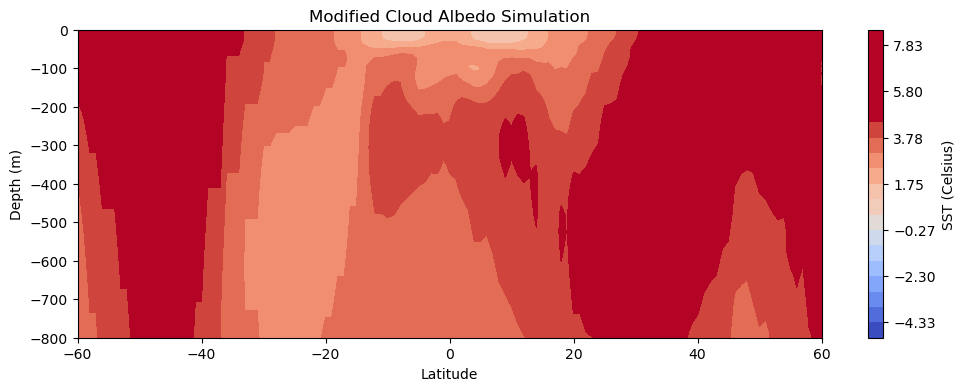

In [8]:
def plot_slice_mmm(X, Y, Z, title, filename):
    # Create a new figure with specified size
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(111)

    # Define colormap and normalization for the colorbar
    cmap = plt.get_cmap("coolwarm", 28)
    norm = colors.Normalize(vmin=-5, vmax=5)
    contour_levels = np.linspace(-5, 8.5, 21)

    # Set the y-axis limit
    ax.set_ylim(-800, 0)

    ax.set_xlabel("Latitude")
    ax.set_ylabel("Depth (m)")

    cs = ax.contourf(X, Y, Z, levels=contour_levels, cmap=cmap, norm=norm)

    # Add colorbar
    cbar = plt.colorbar(
        cs, orientation="vertical", label="SST (Celsius)", extend="both"
    )

    # Set title
    plt.title(title)

    path = "/glade/u/home/nwrye/OceanTemps_Compiles/Plot Images/"

    # Save the plot as PDF
    plt.savefig(path + filename)

    # Show the plot
    plt.show()


plot_slice_mmm(
    mca_ds.lat,
    -mca_ds["lev"],
    mca_ds["TEMP"],
    title="Modified Cloud Albedo Simulation",
    filename="MCA_levlat.pdf",
)

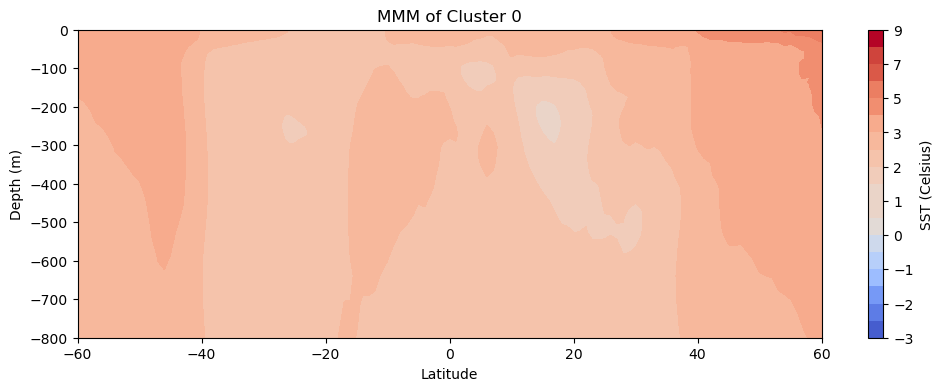

<Figure size 640x480 with 0 Axes>

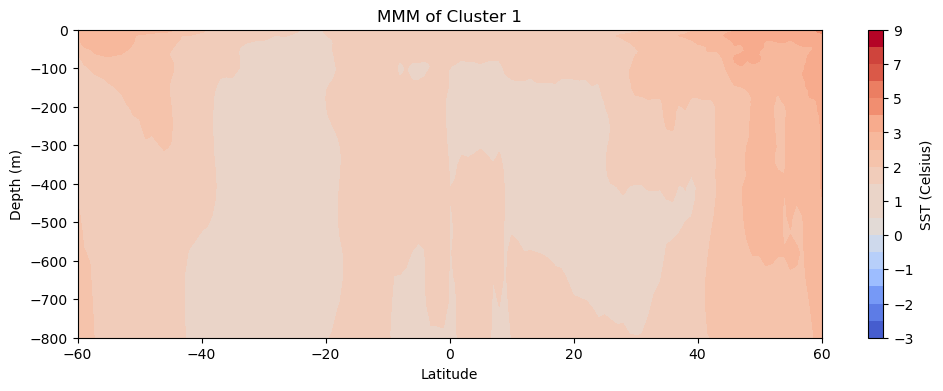

<Figure size 640x480 with 0 Axes>

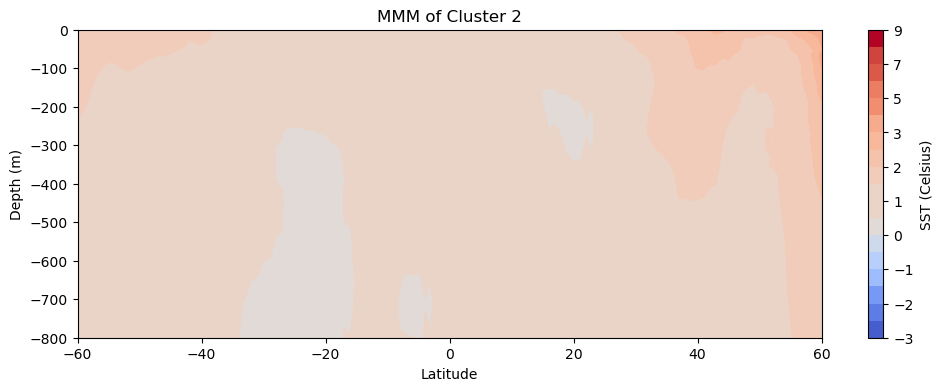

<Figure size 640x480 with 0 Axes>

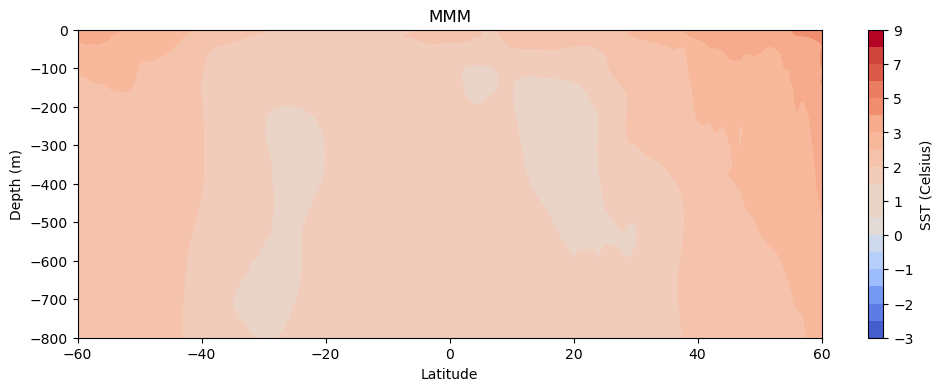

<Figure size 640x480 with 0 Axes>

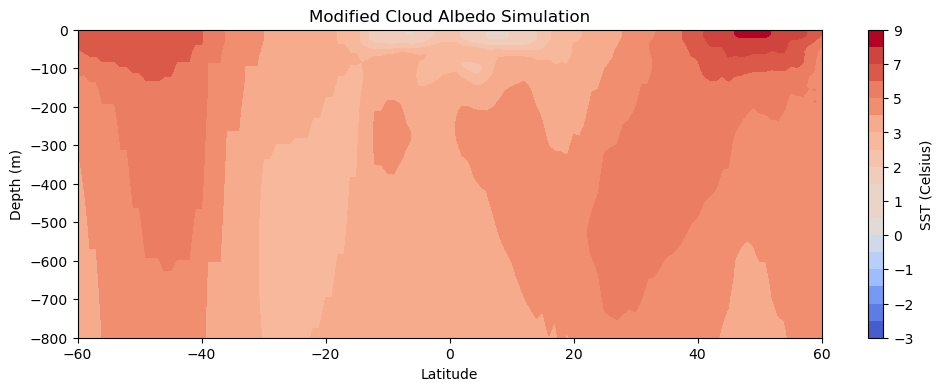

<Figure size 640x480 with 0 Axes>

In [9]:
from matplotlib.colors import TwoSlopeNorm


def plot_slice_mmm(X, Y, Z, title, filename):
    # Create a new figure with specified size
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(111)

    # Define a custom colormap
    cmap = plt.get_cmap("coolwarm", 28)

    # Create a custom normalization with the midpoint at 0
    norm = TwoSlopeNorm(vmin=-3, vmax=9, vcenter=0)

    # Define contour levels, emphasizing the switch at 0
    contour_levels = [
        -3,
        -2.5,
        -2,
        -1.5,
        -1,
        -0.5,
        0,
        0.5,
        1,
        1.5,
        2,
        2.5,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
    ]

    # Set the y-axis limit
    ax.set_ylim(-800, 0)

    ax.set_xlabel("Latitude")
    ax.set_ylabel("Depth (m)")

    # Create the contour plot
    cs = ax.contourf(X, Y, Z, levels=contour_levels, cmap=cmap, norm=norm)

    # Add colorbar with custom ticks
    cbar = plt.colorbar(
        cs, orientation="vertical", label="SST (Celsius)", extend="both"
    )

    # Set the title
    plt.title(title)

    # Define the file path for saving
    path = "/glade/u/home/nwrye/OceanTemps_Compiles/Plot Images/"
    full_path = os.path.join(path, filename)

    # Save the plot as PDF
    plt.savefig(full_path)

    # Show the plot
    plt.show()

    # Clear the figure after saving
    plt.clf()


# Save plots as PDF
plot_slice_mmm(
    clustermmm_temp1.lat,
    -clustermmm_temp1["lev"],
    clustermmm_temp1,
    title="MMM of Cluster 0",
    filename="cluster0_levlat.pdf",
)
plot_slice_mmm(
    clustermmm_temp2.lat,
    -clustermmm_temp2["lev"],
    clustermmm_temp2,
    title="MMM of Cluster 1",
    filename="cluster1_levlat.pdf",
)
plot_slice_mmm(
    clustermmm_temp3.lat,
    -clustermmm_temp3["lev"],
    clustermmm_temp3,
    title="MMM of Cluster 2",
    filename="cluster2_levlat.pdf",
)
plot_slice_mmm(mmm.lat, -mmm["lev"], mmm, title="MMM", filename="mmm_levlat.pdf")
plot_slice_mmm(
    mca_ds.lat,
    -mca_ds["lev"],
    mca_ds["TEMP"],
    title="Modified Cloud Albedo Simulation",
    filename="MCA_levlat.pdf",
)

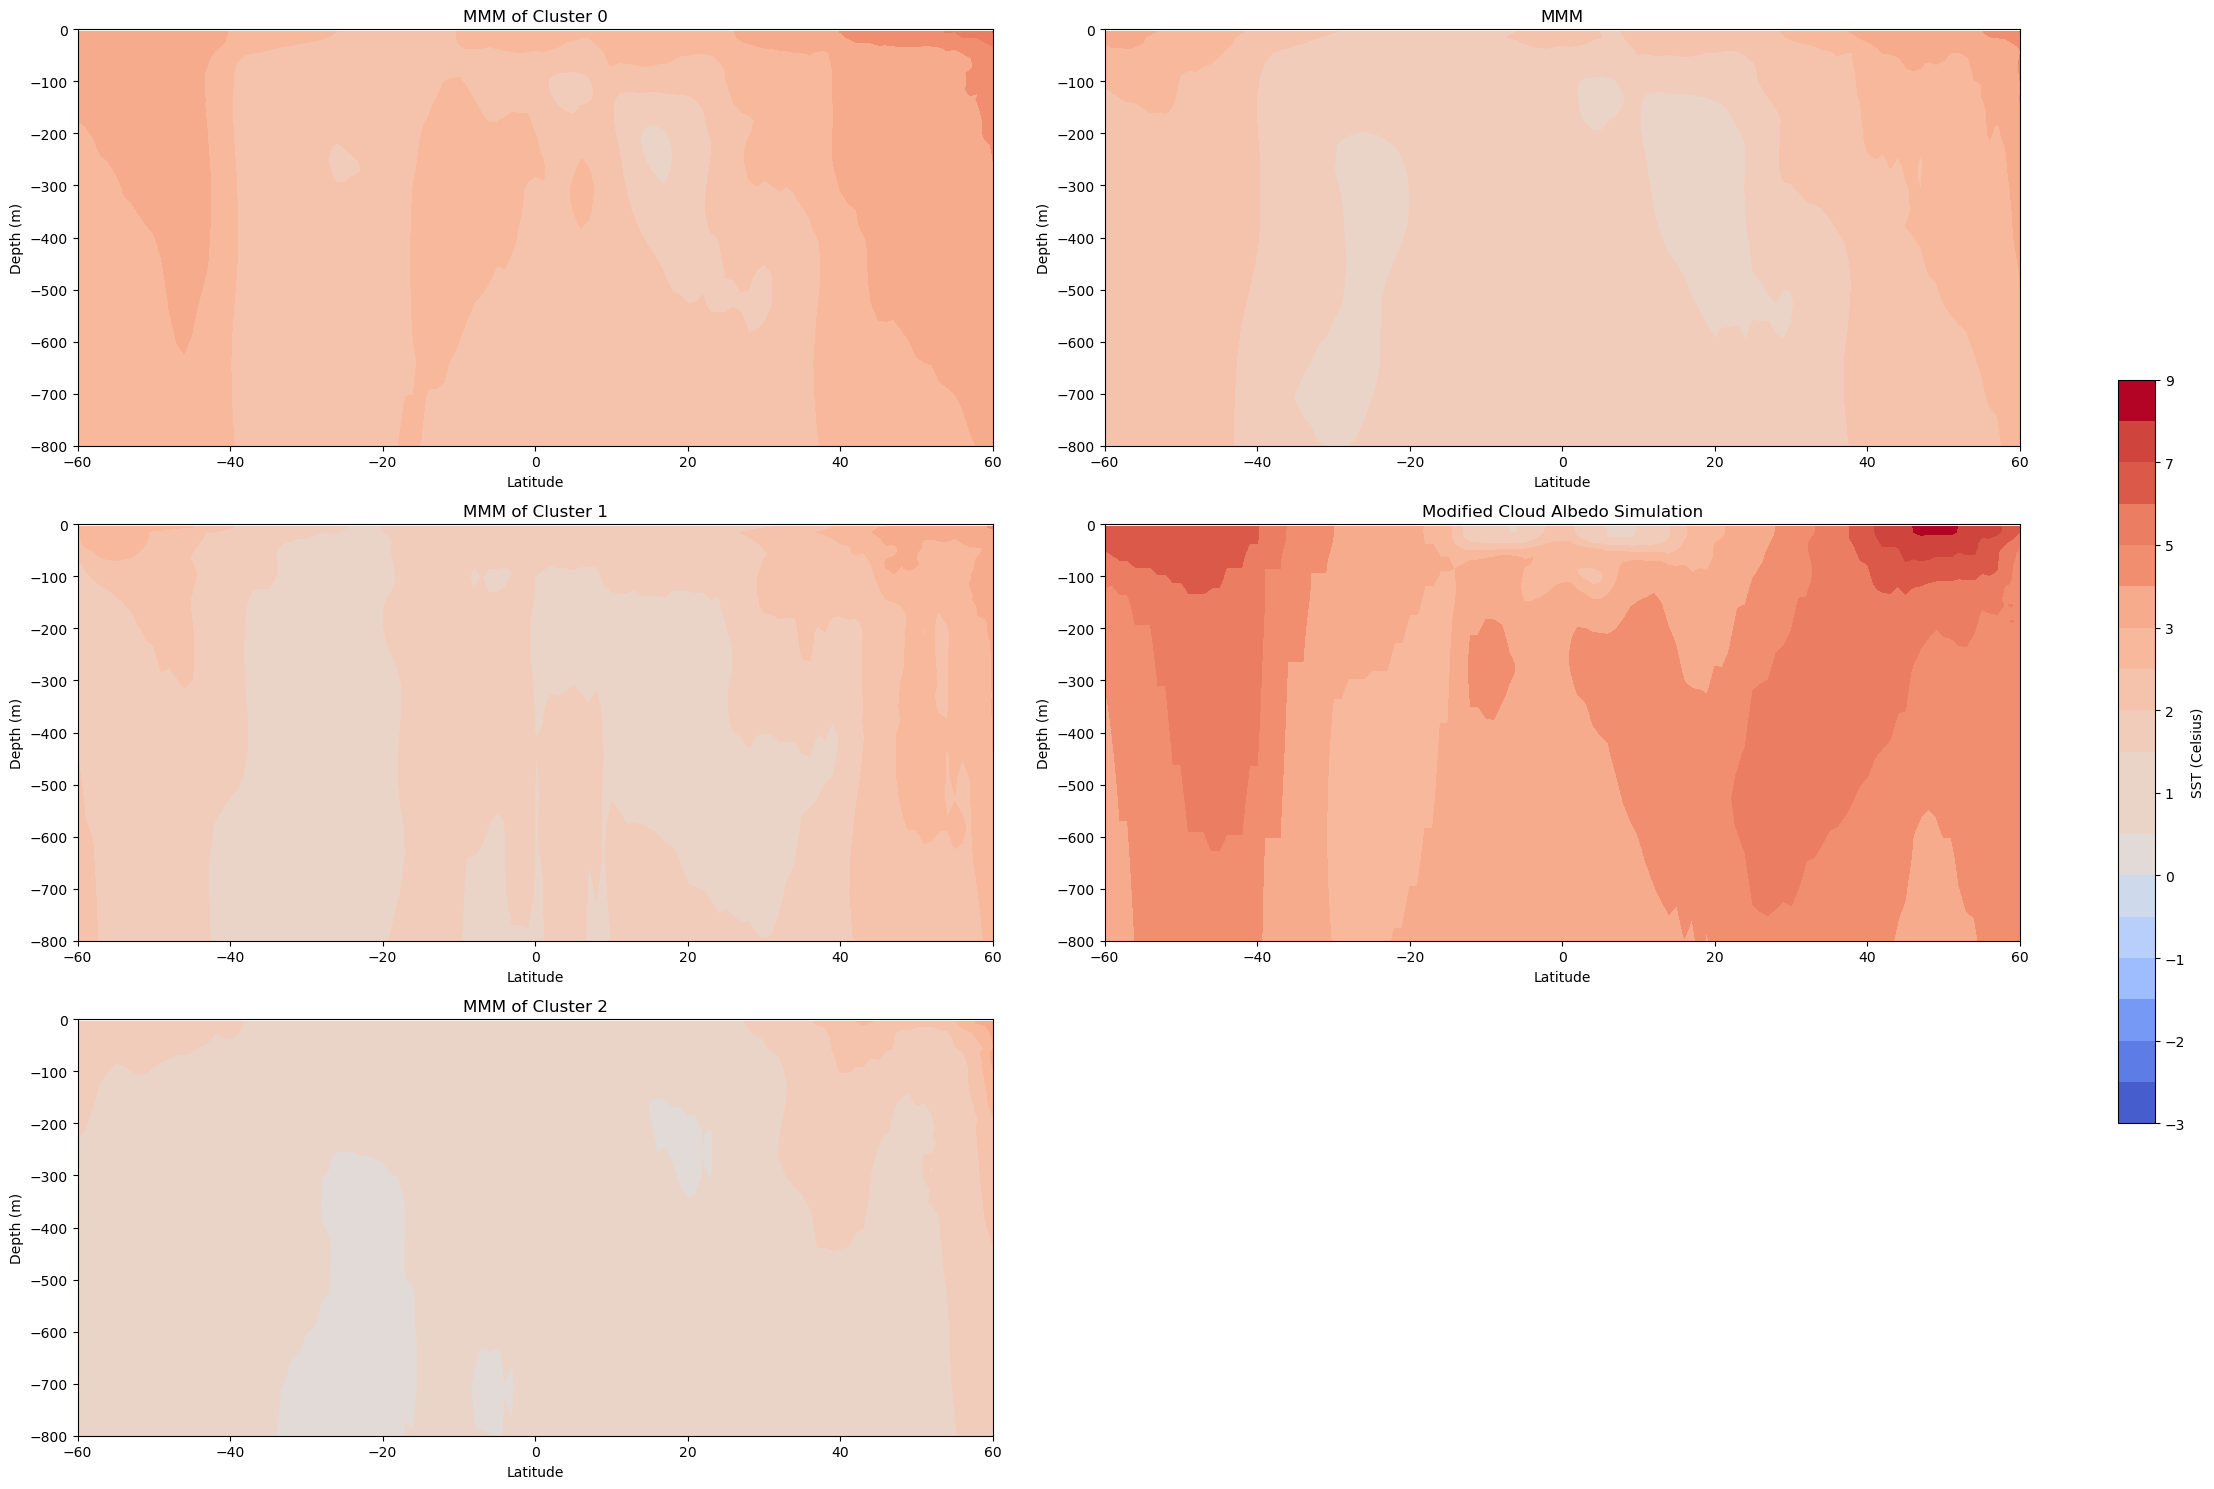

In [10]:
def plot_slice_mmm(ax, X, Y, Z, title, cmap, norm, contour_levels):
    # Set the y-axis limit
    ax.set_ylim(-800, 0)

    ax.set_xlabel("Latitude")
    ax.set_ylabel("Depth (m)")

    cs = ax.contourf(X, Y, Z, levels=contour_levels, cmap=cmap, norm=norm)

    # Set title
    ax.set_title(title)

    return cs


# Data and titles
datasets = [
    (
        clustermmm_temp1.lat,
        -clustermmm_temp1["lev"],
        clustermmm_temp1,
        "MMM of Cluster 0",
    ),
    (
        clustermmm_temp2.lat,
        -clustermmm_temp2["lev"],
        clustermmm_temp2,
        "MMM of Cluster 1",
    ),
    (
        clustermmm_temp3.lat,
        -clustermmm_temp3["lev"],
        clustermmm_temp3,
        "MMM of Cluster 2",
    ),
    (mmm.lat, -mmm["lev"], mmm, "MMM"),
    (mca_ds.lat, -mca_ds["lev"], mca_ds["TEMP"], "Modified Cloud Albedo Simulation"),
]

# Create subplots with custom layout
fig, axs = plt.subplots(3, 2, figsize=(24, 15))  # 3 rows, 2 columns grid

# Define a custom colormap
cmap = plt.get_cmap("coolwarm", 28)

# Create a custom normalization with the midpoint at 0
norm = TwoSlopeNorm(vmin=-3, vmax=9, vcenter=0)

# Define contour levels, emphasizing the switch at 0
contour_levels = [
    -3,
    -2.5,
    -2,
    -1.5,
    -1,
    -0.5,
    0,
    0.5,
    1,
    1.5,
    2,
    2.5,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
]

# Plot the cluster plots in the left column (1st, 2nd, and 3rd rows)
for i, (X, Y, Z, title) in enumerate(datasets[:3]):
    ax = axs[i, 0]  # Left column
    cs = plot_slice_mmm(ax, X, Y, Z, title, cmap, norm, contour_levels)

# Plot the remaining two plots in the right column (1st and 2nd rows)
for i, (X, Y, Z, title) in enumerate(datasets[3:]):
    ax = axs[i, 1]  # Right column
    cs = plot_slice_mmm(ax, X, Y, Z, title, cmap, norm, contour_levels)

# Hide the last subplot (bottom-right) if not used
axs[2, 1].axis("off")

# Adjust the space for the colorbar on the right
cbar = fig.colorbar(
    cs,
    ax=axs,
    orientation="vertical",
    label="SST (Celsius)",
    extend="both",
    fraction=0.02,
    pad=0.1,
)

# Adjust layout to push the colorbar further to the right
plt.tight_layout(
    rect=[0, 0, 0.85, 1]
)  # Adjust the layout to make room for the colorbar

# Save the figure with all subplots
plt.savefig("/glade/u/home/nwrye/OceanTemps_Compiles/Plot Images/Latitudinal_plots.pdf")
plt.show()

| Cluster 0 | Cluster 1 | Cluster 2 |
|-----------|-----------|-----------|
| CESM1.2    | CCSM4     |  |
| CESM2      | COSMOS    | GISS      |
| EC_Earth3.3| IPSLCM6A | NorESM-F  |
| HADGEM3    |           | IPSLCM5A2 |
| MIROC4     |           | IPSLCM5A |
| Utrecht    |           |           |
|  LEEDS     |           |           |